# In this notebook, a unit square mesh is used to show some basic commands which we will be using in fenics implementation.  

* Different methods to import the mesh
* Print the cordinates, vertex, cells
* Save dof in xdmf file 
* Visualise the cell data and point data in Paraview

## Import dolfin module

In [1]:
from dolfin import *
import numpy as np

## Next two ways of using the mesh is shown
1. Importing mesh saved as xdmf file
2. Using the inbuilt mesh in dolfin

In [6]:
mesh = UnitSquareMesh(1, 1)

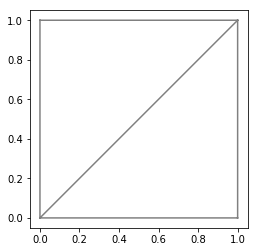

In [7]:
plot(mesh)

### Create the vector function apace in mesh 

In [9]:
V = VectorFunctionSpace(mesh, 'Lagrange', degree=1)

### DOF to vertex map

In [10]:
num_dof = mesh.num_vertices()*V.dofmap().num_entity_dofs(0)
dof_map = Function(V,name="dof")
dof_map.vector()[:] = [int(i) for i in np.linspace(0,num_dof-1,num_dof)]

### Save the dof in a xdmf file which can be visualised in Paraview
* Press V to visualise the cell and point data correspondng to a specific dof. 

In [11]:
with XDMFFile("dof.xdmf") as xdmf:
    xdmf.write(dof_map)

In [12]:
print(dof_map.vector()[:])

[0. 1. 2. 3. 4. 5. 6. 7.]


In [13]:
mesh.coordinates()

array([[0., 0.],
       [1., 0.],
       [0., 1.],
       [1., 1.]])

In [14]:
print(mesh.cells())

[[0 1 3]
 [0 2 3]]


In [15]:
V.tabulate_dof_coordinates()

array([[0., 1.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [1., 0.]])

In [13]:
mesh.num_cells()

2

In [14]:
mesh.num_edges()

5

In [15]:
mesh.num_vertices()

4